# 코로나
* fbprophet 설치 : https://www.python2.net/questions-13349.htm
* https://www.egbiz.or.kr/prjCategory/a/m/selectPrjView.do?prjDegreeId=PD000000019032

In [57]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [58]:
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin': # 맥이면
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # 윈도우면
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')
plt.rcParams['axes.unicode_minus'] = False

In [3]:
data = pd.read_csv('D:/data/경기도확진환자_연습용.csv', encoding = 'cp949')

In [44]:
data['확진일자'] = pd.to_datetime(data['확진일자'])
data.head()

,연번,확진자,성별,나이(만),연령대,확진일자,증상발현일,무증상/조사중,경기번호,지역,재검출,감염경로,GRP,구분2,구분,지역 (group),지역 + 시,확진일-증상발현일,무증상자수
0,1,#3,M,54,50,2020-01-26,2020. 1. 22.,,고양-1,고양일산서,,해외유입,grp01,,Primary,고양,고양시,4,0
1,2,#4,M,55,50,2020-01-27,2020. 1. 25.,,평택-1,평택,,해외유입,grp02,,Primary,평택,평택시,2,0
2,3,#12,M,49,40,2020-02-01,2020. 1. 20.,,부천-1,부천,,해외유입,grp03,,Primary,부천,부천시,12,0
3,4,#14,F,40,40,2020-02-02,2020. 1. 29.,,부천-2,부천,,해외유입,grp03,,접촉자,부천,부천시,4,0
4,5,#15,M,42,40,2020-02-02,2020. 2. 1.,,수원-1,수원장안,,해외유입,grp04,,Primary,수원,수원시,1,0


In [78]:
a = pd.DataFrame(data['확진일자'].value_counts())
a = a.sort_index()
a.reset_index(inplace = True)
a.columns = ['ds','y']
a['floor'] = 0
a

,ds,y,floor
0,2020-01-26,1,0
1,2020-01-27,1,0
2,2020-02-01,1,0
3,2020-02-02,2,0
4,2020-02-05,2,0
...,...,...,...
175,2020-08-10,10,0
176,2020-08-11,19,0
177,2020-08-12,22,0
178,2020-08-13,40,0


In [87]:
m = Prophet(changepoint_prior_scale=0.001) 
m.fit(a)
future = m.make_future_dataframe(periods = 5)
future['floor'] = 1
forecast = m1.predict(future)
forecast

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-26,7.213853,-1.570078,15.190969,7.213853,7.213853,0.0,0.0,0.0,0.0,0.0,0.0,7.213853
1,2020-01-27,7.235692,-1.569671,16.429977,7.235692,7.235692,0.0,0.0,0.0,0.0,0.0,0.0,7.235692
2,2020-02-01,7.344885,-1.136700,15.930956,7.344885,7.344885,0.0,0.0,0.0,0.0,0.0,0.0,7.344885
3,2020-02-02,7.366724,-1.420138,15.334763,7.366724,7.366724,0.0,0.0,0.0,0.0,0.0,0.0,7.366724
4,2020-02-05,7.432239,-0.688512,15.240488,7.432239,7.432239,0.0,0.0,0.0,0.0,0.0,0.0,7.432239
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,2020-08-15,11.631640,2.646306,19.590502,11.631640,11.631640,0.0,0.0,0.0,0.0,0.0,0.0,11.631640
181,2020-08-16,11.653547,2.858514,20.222504,11.653547,11.653547,0.0,0.0,0.0,0.0,0.0,0.0,11.653547
182,2020-08-17,11.675453,3.416292,20.206315,11.675452,11.675454,0.0,0.0,0.0,0.0,0.0,0.0,11.675453
183,2020-08-18,11.697360,2.836018,20.214916,11.697357,11.697363,0.0,0.0,0.0,0.0,0.0,0.0,11.697360


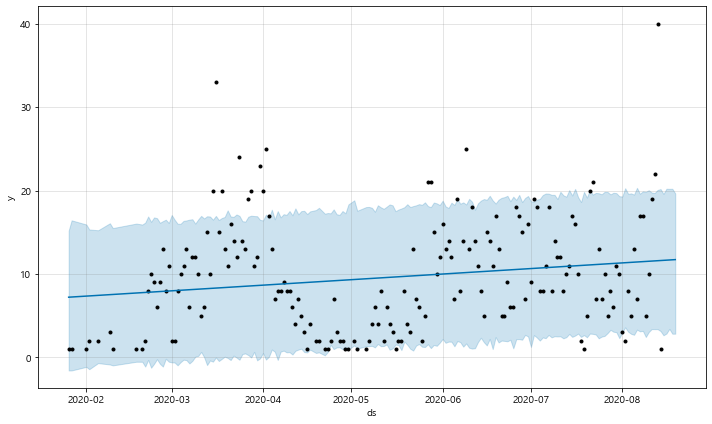

In [88]:
m.plot(forecast);